In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset

%matplotlib inline

import statsmodels.api as sm

/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Create Super Dataset

#2012
fire_2012 = pd.read_csv('AFD_CY12 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2012.dropna(inplace=True)
fire_2012.index = pd.to_datetime(fire_2012.index)

#2013
fire_2013 = pd.read_csv('AFD_CY13 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2013.dropna(inplace=True)
fire_2013.index = pd.to_datetime(fire_2013.index)

#2014
fire_2014 = pd.read_csv('AFD_CY14 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2014.dropna(inplace=True)
fire_2014.index = pd.to_datetime(fire_2014.index)

#2015
fire_2015 = pd.read_csv('AFD_CY15 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2015.dropna(inplace=True)
fire_2015.index = pd.to_datetime(fire_2015.index)

#2016
fire_2016 = pd.read_csv('AFD_CY16 - SOC Fire Data Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2016.dropna(inplace=True)
fire_2016.index = pd.to_datetime(fire_2016.index)

#2017
fire_2017 = pd.read_csv('AFD_CY17 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2017.dropna(inplace=True)
fire_2017.index = pd.to_datetime(fire_2017.index)

final_df = pd.concat([fire_2012, fire_2013, fire_2014, fire_2015, fire_2016, fire_2017])


In [3]:
final_df.head()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,EMS Time Phone Pickup,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,
2012-01-01 00:01:22,12000002,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-2204,ENG66,Code 3,4F,-,01/01/2012 00:01:22,01/01/2012 00:01:58,No,Yes/Left Blank,30228693,97702907,01/01/2012 00:03:29,01/01/2012 00:05:11
2012-01-01 00:11:47,12000008,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2206,ENG22,Code 3,1M,-,01/01/2012 00:11:47,01/01/2012 00:12:36,No,Yes/Left Blank,30222216,97705176,01/01/2012 00:13:07,01/01/2012 00:15:13
2012-01-01 00:16:14,12000012,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2403,ENG24,Code 3,2M,-,01/01/2012 00:16:14,01/01/2012 00:16:40,No,Yes/Left Blank,30172163,97743423,01/01/2012 00:16:51,01/01/2012 00:19:44
2012-01-01 00:21:26,12000015,2012,Not Cancelled,Other,AFD,1st or Only AFD,00-3001,ENG30,Code 3,3F,-,01/01/2012 00:21:26,01/01/2012 00:22:13,No,Yes/Left Blank,30372899,97696675,01/01/2012 00:22:52,01/01/2012 00:26:35
2012-01-01 00:26:09,12000019,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-1902,QNT19,Code 3,4F,-,01/01/2012 00:26:09,01/01/2012 00:26:41,No,Yes/Left Blank,30352693,97776605,01/01/2012 00:27:43,01/01/2012 00:35:34


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302436 entries, 2012-01-01 00:01:22 to 2017-11-09 01:12:20
Data columns (total 19 columns):
Master Incident Number           302436 non-null int64
CalendarYear                     302436 non-null int64
Cancellation Status              302436 non-null object
General Dispatched Problem       302436 non-null object
Calltaker Agency (AFD or EMS)    302436 non-null object
Order of AFD Arrival             302436 non-null object
Response Area (COA Only)         302436 non-null object
First Arriving Unit Name         302436 non-null object
Response Status                  302436 non-null object
PriorityDescription              302436 non-null object
EMS Time Phone Pickup            302436 non-null object
Earliest Time Phone Pickup       302436 non-null object
First Unit Assigned              302436 non-null object
Did not Reduce to Code 1         302436 non-null object
Onscene Time Was Correct         302436 non-null object
Latitude         

In [5]:
final_df.describe()

,Master Incident Number,CalendarYear,Latitude,Longitude
count,3.024360e+05,302436.000000,3.024360e+05,3.024360e+05
mean,1.445339e+07,2014.393111,3.025670e+07,9.761881e+07
std,1.672434e+06,1.672922,1.051681e+06,3.384386e+06
min,1.000000e+00,2012.000000,0.000000e+00,0.000000e+00
25%,1.305387e+07,2013.000000,3.023244e+07,9.770031e+07
50%,1.410430e+07,2014.000000,3.028130e+07,9.773554e+07
75%,1.603886e+07,2016.000000,3.035207e+07,9.776438e+07
max,1.711014e+07,2017.000000,3.051518e+07,9.792725e+07


In [6]:
final_df['Response Area (COA Only)'].value_counts().sort_index()

00-0020        1
00-0040       70
00-0060       37
00-0070       74
00-0080       11
00-0090        2
00-0101    11356
00-0102     8173
00-0103       16
00-0201     2911
00-0202     2171
00-0203     1358
00-0301     2675
00-0302     1194
00-0303     1708
00-0401     2201
00-0402      291
00-0501     4206
00-0502     2046
00-0503      485
00-0504     1019
00-0505      987
00-0601     3079
00-0602     1032
00-0603     2482
00-0604     1452
00-0701     5455
00-0702     2516
00-0801     2656
00-0802     1481
           ...  
00-4502      397
00-4503      283
00-4504      337
00-4505      241
00-4506      116
00-4507       27
00-4508       43
00-4601       21
00-4602       73
00-4603       21
00-4604        5
00-4605       18
00-4606       81
00-4607       51
00-4608       78
00-4609      158
00-4610       24
00-4703        1
04-2304        2
04-2604        9
04-2605        1
04-2608        1
04-2609        3
04-2801        1
04-2808        1
04-4103        1
04-4406        1
04-4701       

In [7]:
final_df['First Unit Arrived']

AFD Time Phone Pickup
2012-01-01 00:01:22    01/01/2012 00:05:11
2012-01-01 00:11:47    01/01/2012 00:15:13
2012-01-01 00:16:14    01/01/2012 00:19:44
2012-01-01 00:21:26    01/01/2012 00:26:35
2012-01-01 00:26:09    01/01/2012 00:35:34
2012-01-01 00:35:36    01/01/2012 00:43:17
2012-01-01 00:44:26    01/01/2012 00:50:06
2012-01-01 00:46:52    01/01/2012 00:54:59
2012-01-01 00:55:57    01/01/2012 01:01:13
2012-01-01 01:02:24    01/01/2012 01:06:51
2012-01-01 01:03:25    01/01/2012 01:12:33
2012-01-01 01:21:28    01/01/2012 01:25:48
2012-01-01 01:28:31    01/01/2012 01:31:26
2012-01-01 01:28:48    01/01/2012 01:37:16
2012-01-01 01:32:39    01/01/2012 01:38:08
2012-01-01 01:37:32    01/01/2012 01:44:08
2012-01-01 01:55:42    01/01/2012 02:00:25
2012-01-01 02:01:08    01/01/2012 02:06:55
2012-01-01 02:11:47    01/01/2012 02:16:47
2012-01-01 02:13:14    01/01/2012 02:16:24
2012-01-01 02:14:53    01/01/2012 02:20:37
2012-01-01 02:16:48    01/01/2012 02:24:00
2012-01-01 02:18:25    01/01/201

In [8]:
final_df['First Unit Arrived'] = pd.to_datetime(final_df['First Unit Arrived'])

In [9]:
final_df['First Unit Arrived']

AFD Time Phone Pickup
2012-01-01 00:01:22   2012-01-01 00:05:11
2012-01-01 00:11:47   2012-01-01 00:15:13
2012-01-01 00:16:14   2012-01-01 00:19:44
2012-01-01 00:21:26   2012-01-01 00:26:35
2012-01-01 00:26:09   2012-01-01 00:35:34
2012-01-01 00:35:36   2012-01-01 00:43:17
2012-01-01 00:44:26   2012-01-01 00:50:06
2012-01-01 00:46:52   2012-01-01 00:54:59
2012-01-01 00:55:57   2012-01-01 01:01:13
2012-01-01 01:02:24   2012-01-01 01:06:51
2012-01-01 01:03:25   2012-01-01 01:12:33
2012-01-01 01:21:28   2012-01-01 01:25:48
2012-01-01 01:28:31   2012-01-01 01:31:26
2012-01-01 01:28:48   2012-01-01 01:37:16
2012-01-01 01:32:39   2012-01-01 01:38:08
2012-01-01 01:37:32   2012-01-01 01:44:08
2012-01-01 01:55:42   2012-01-01 02:00:25
2012-01-01 02:01:08   2012-01-01 02:06:55
2012-01-01 02:11:47   2012-01-01 02:16:47
2012-01-01 02:13:14   2012-01-01 02:16:24
2012-01-01 02:14:53   2012-01-01 02:20:37
2012-01-01 02:16:48   2012-01-01 02:24:00
2012-01-01 02:18:25   2012-01-01 02:22:15
2012-01-01 0

In [10]:
final_df['Response Time (s)'] = (final_df['First Unit Arrived'] - final_df.index).astype('timedelta64[s]')
final_df['Response Time (m)'] = ((final_df['First Unit Arrived'] - final_df.index).astype('timedelta64[s]'))/60

In [11]:
final_df.head()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,...,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived,Response Time (s),Response Time (m)
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:01:22,12000002,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-2204,ENG66,Code 3,4F,...,01/01/2012 00:01:22,01/01/2012 00:01:58,No,Yes/Left Blank,30228693,97702907,01/01/2012 00:03:29,2012-01-01 00:05:11,229.0,3.816667
2012-01-01 00:11:47,12000008,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2206,ENG22,Code 3,1M,...,01/01/2012 00:11:47,01/01/2012 00:12:36,No,Yes/Left Blank,30222216,97705176,01/01/2012 00:13:07,2012-01-01 00:15:13,206.0,3.433333
2012-01-01 00:16:14,12000012,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2403,ENG24,Code 3,2M,...,01/01/2012 00:16:14,01/01/2012 00:16:40,No,Yes/Left Blank,30172163,97743423,01/01/2012 00:16:51,2012-01-01 00:19:44,210.0,3.500000
2012-01-01 00:21:26,12000015,2012,Not Cancelled,Other,AFD,1st or Only AFD,00-3001,ENG30,Code 3,3F,...,01/01/2012 00:21:26,01/01/2012 00:22:13,No,Yes/Left Blank,30372899,97696675,01/01/2012 00:22:52,2012-01-01 00:26:35,309.0,5.150000
2012-01-01 00:26:09,12000019,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-1902,QNT19,Code 3,4F,...,01/01/2012 00:26:09,01/01/2012 00:26:41,No,Yes/Left Blank,30352693,97776605,01/01/2012 00:27:43,2012-01-01 00:35:34,565.0,9.416667


In [12]:
#00-01XX Downtown
#00-4209 Moore's Crossing

#00-2608
#00-0504 Eastern Crescent
#00-0505 Eastern Crescent

#00-2405
#00-2404
#00-2403

downtown_df = final_df[(final_df['Response Area (COA Only)']=='00-0101') | (final_df['Response Area (COA Only)']=='00-0102')\
        | (final_df['Response Area (COA Only)']=='00-0103')]

In [13]:
downtown_df.tail()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,...,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived,Response Time (s),Response Time (m)
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,,,
2017-11-08 14:35:24,17109929,2017,Cancelled On Arrival,Medical,EMS,1st or Only AFD,00-0101,ENG01,Code 3,1M,...,11/08/2017 14:35:06,11/08/2017 14:35:25,No,Yes/Left Blank,30266475,97737187,11/08/2017 14:36:20,2017-11-08 14:39:12,228.0,3.80
2017-11-08 15:20:21,17109949,2017,Not Cancelled,Medical,EMS,1st or Only AFD,00-0101,ENG13,Code 3,2M,...,11/08/2017 15:15:22,11/08/2017 15:20:22,No,Yes/Left Blank,30263075,97736083,11/08/2017 15:20:30,2017-11-08 15:23:24,183.0,3.05
2017-11-08 16:36:13,17109983,2017,Not Cancelled,Medical,EMS,1st or Only AFD,00-0101,ENG13,Code 3,2M,...,11/08/2017 16:32:42,11/08/2017 16:36:15,No,Yes/Left Blank,30261378,97737309,11/08/2017 16:36:24,2017-11-08 16:37:37,84.0,1.40
2017-11-08 19:40:04,17110073,2017,Left Blank,Medical,EMS,Left Blank,00-0102,ENG01,Left Blank,1M,...,11/08/2017 19:36:59,11/08/2017 19:40:05,No,Yes/Left Blank,30267401,97739198,11/08/2017 19:41:00,2017-11-08 19:42:07,123.0,2.05
2017-11-09 01:02:15,17110137,2017,Left Blank,Medical,EMS,Left Blank,00-0101,ENG01,Left Blank,2M,...,11/09/2017 00:59:45,11/09/2017 01:02:17,No,Yes/Left Blank,30267700,97737918,11/09/2017 01:03:37,2017-11-09 01:05:39,204.0,3.40


In [14]:
downtown_month_df = downtown_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

In [15]:
downtown_month_df

,Response Time (s)
AFD Time Phone Pickup,
2012-01-31,309.740385
2012-02-29,317.850746
2012-03-31,335.762500
2012-04-30,309.477733
2012-05-31,322.883065
2012-06-30,324.721973
2012-07-31,296.100457
2012-08-31,303.196850
2012-09-30,289.552941


In [16]:
#Rename the column
downtown_month_df.columns = ['Avg Response Time (s)']
downtown_month_df.head()

,Avg Response Time (s)
AFD Time Phone Pickup,
2012-01-31,309.740385
2012-02-29,317.850746
2012-03-31,335.762500
2012-04-30,309.477733
2012-05-31,322.883065


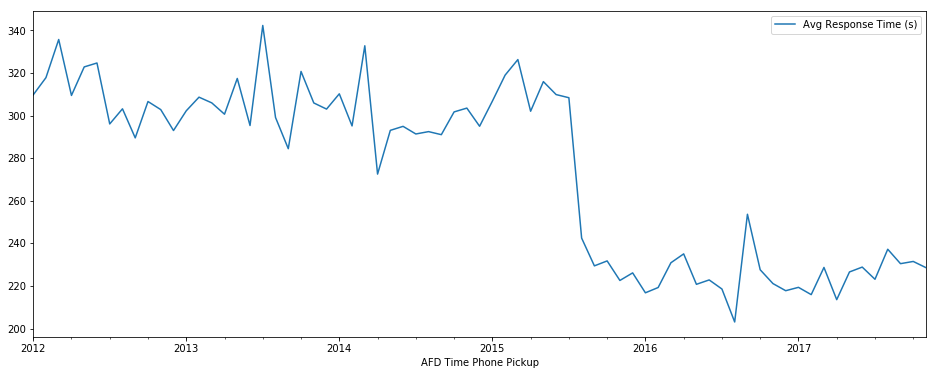

In [17]:
downtown_month_df.plot(figsize=(16,6))

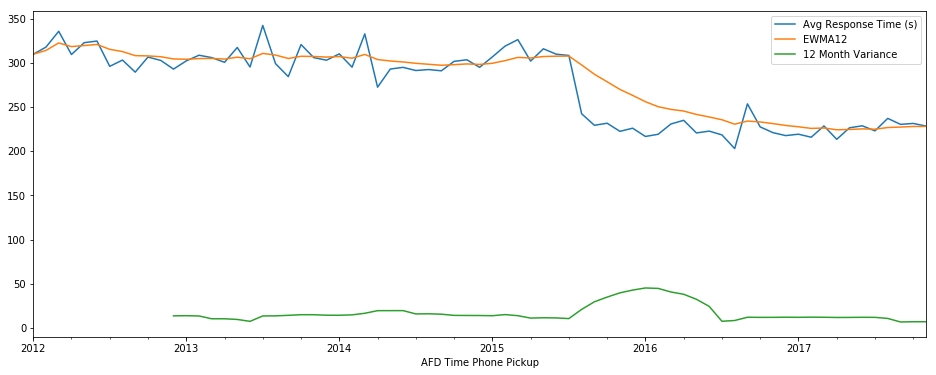

In [18]:
#Moving Averages
downtown_month_df['EWMA12'] = downtown_month_df['Avg Response Time (s)'].ewm(span=12).mean()
downtown_month_df['EWMA6'] = downtown_month_df['Avg Response Time (s)'].ewm(span=6).mean()
#Variance
downtown_month_df['12 Month Variance'] = downtown_month_df['Avg Response Time (s)'].rolling(12).std()

downtown_month_df[['Avg Response Time (s)', 'EWMA12', '12 Month Variance']].plot(figsize=(16,6))

In [19]:
downtown_month_df

,Avg Response Time (s),EWMA12,EWMA6,12 Month Variance
AFD Time Phone Pickup,,,,
2012-01-31,309.740385,309.740385,309.740385,NaN
2012-02-29,317.850746,314.133497,314.471429,NaN
2012-03-31,335.762500,322.575302,324.042644,NaN
2012-04-30,309.477733,318.440911,318.416783,NaN
2012-05-31,322.883065,319.647828,319.984323,NaN
2012-06-30,324.721973,320.881113,321.545244,NaN
2012-07-31,296.100457,315.351396,313.513364,NaN
2012-08-31,303.196850,312.814930,310.351543,NaN
2012-09-30,289.552941,308.212880,304.106840,NaN


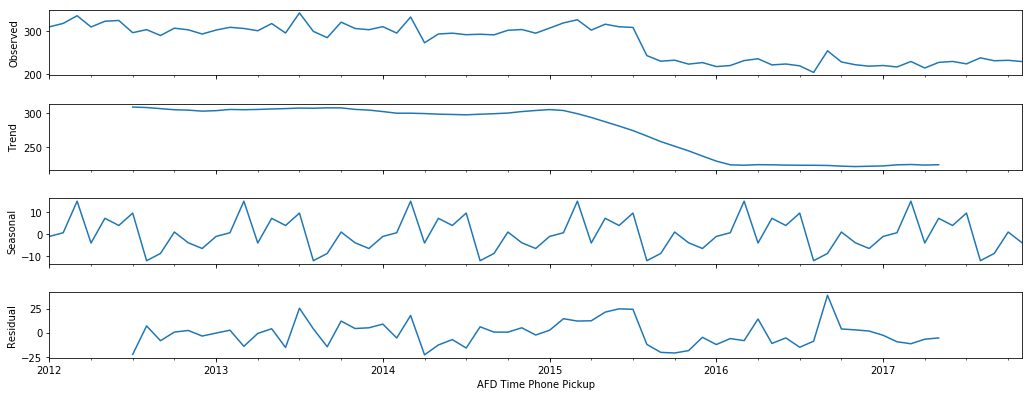

In [20]:
#ETS Seasonal Decompose
result = seasonal_decompose(downtown_month_df['Avg Response Time (s)'])
fig = result.plot()
fig.set_size_inches(16,6)

In [21]:
#ARIMA
model = sm.tsa.statespace.SARIMAX(downtown_month_df['Avg Response Time (s)'], order=(1,0,0), seasonal_order=(1,1,1,12))

model_result = model.fit()

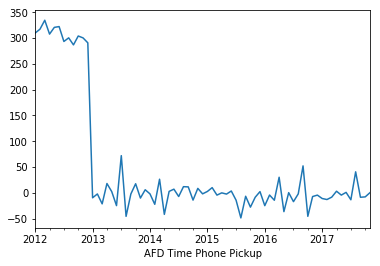

In [22]:
model_result.resid.plot()

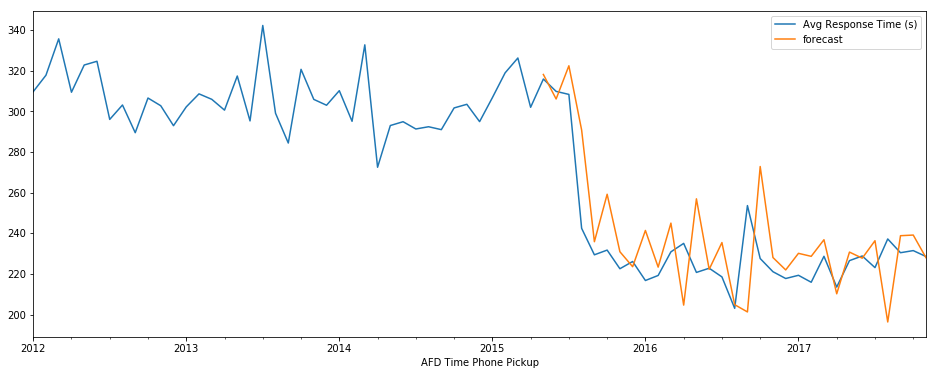

In [23]:
downtown_month_df['forecast'] = model_result.predict(start=40, end=70)
downtown_month_df[['Avg Response Time (s)', 'forecast']].plot(figsize=(16,6))

In [24]:
downtown_month_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2012-01-31 to 2017-11-30
Freq: M
Data columns (total 5 columns):
Avg Response Time (s)    71 non-null float64
EWMA12                   71 non-null float64
EWMA6                    71 non-null float64
12 Month Variance        60 non-null float64
forecast                 31 non-null float64
dtypes: float64(5)
memory usage: 3.3 KB


In [25]:
future_dates = [downtown_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=downtown_month_df.columns)
future_df.tail()

,Avg Response Time (s),EWMA12,EWMA6,12 Month Variance,forecast
2019-06-30,NaN,NaN,NaN,NaN,NaN
2019-07-30,NaN,NaN,NaN,NaN,NaN
2019-08-30,NaN,NaN,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN,NaN,NaN
2019-10-30,NaN,NaN,NaN,NaN,NaN


In [26]:
#Need to add points to the end of the dataset to forecast out


future_final_df = pd.concat([downtown_month_df,future_df])
future_final_df.tail(30)
future_final_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2012-01-31 to 2019-10-30
Data columns (total 5 columns):
Avg Response Time (s)    71 non-null float64
EWMA12                   71 non-null float64
EWMA6                    71 non-null float64
12 Month Variance        60 non-null float64
forecast                 31 non-null float64
dtypes: float64(5)
memory usage: 4.4 KB


In [27]:
future_final_df

,Avg Response Time (s),EWMA12,EWMA6,12 Month Variance,forecast
2012-01-31,309.740385,309.740385,309.740385,NaN,NaN
2012-02-29,317.850746,314.133497,314.471429,NaN,NaN
2012-03-31,335.762500,322.575302,324.042644,NaN,NaN
2012-04-30,309.477733,318.440911,318.416783,NaN,NaN
2012-05-31,322.883065,319.647828,319.984323,NaN,NaN
2012-06-30,324.721973,320.881113,321.545244,NaN,NaN
2012-07-31,296.100457,315.351396,313.513364,NaN,NaN
2012-08-31,303.196850,312.814930,310.351543,NaN,NaN
2012-09-30,289.552941,308.212880,304.106840,NaN,NaN
2012-10-31,306.626923,307.912342,304.852647,NaN,NaN


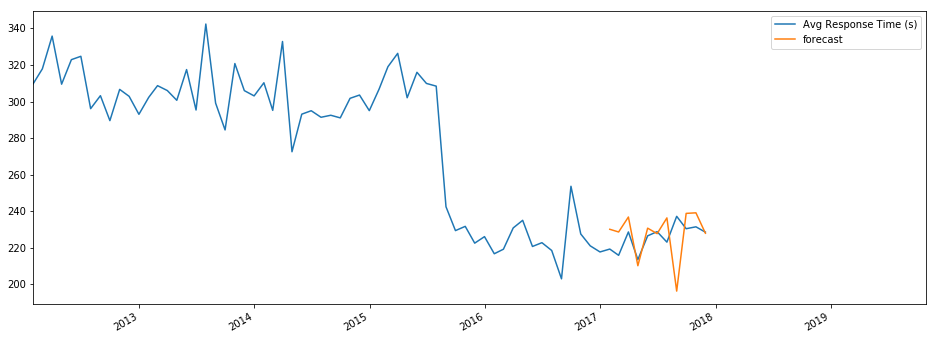

In [28]:
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=96)
future_final_df[['Avg Response Time (s)', 'forecast']].plot(figsize=(16,6))

In [29]:
future_final_df.tail(20)

,Avg Response Time (s),EWMA12,EWMA6,12 Month Variance,forecast
2018-03-30,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,239.045251
2018-05-30,NaN,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,245.232609
2018-07-30,NaN,NaN,NaN,NaN,NaN
2018-08-30,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,NaN,NaN,240.661874
2018-10-30,NaN,NaN,NaN,NaN,NaN
2018-11-30,NaN,NaN,NaN,NaN,233.352323
2018-12-30,NaN,NaN,NaN,NaN,NaN


In [30]:
downtown_month_df.to_csv

<bound method DataFrame.to_csv of                        Avg Response Time (s)      EWMA12       EWMA6  \
AFD Time Phone Pickup                                                  
2012-01-31                        309.740385  309.740385  309.740385   
2012-02-29                        317.850746  314.133497  314.471429   
2012-03-31                        335.762500  322.575302  324.042644   
2012-04-30                        309.477733  318.440911  318.416783   
2012-05-31                        322.883065  319.647828  319.984323   
2012-06-30                        324.721973  320.881113  321.545244   
2012-07-31                        296.100457  315.351396  313.513364   
2012-08-31                        303.196850  312.814930  310.351543   
2012-09-30                        289.552941  308.212880  304.106840   
2012-10-31                        306.626923  307.912342  304.852647   
2012-11-30                        302.828431  306.982109  304.259657   
2012-12-31                    

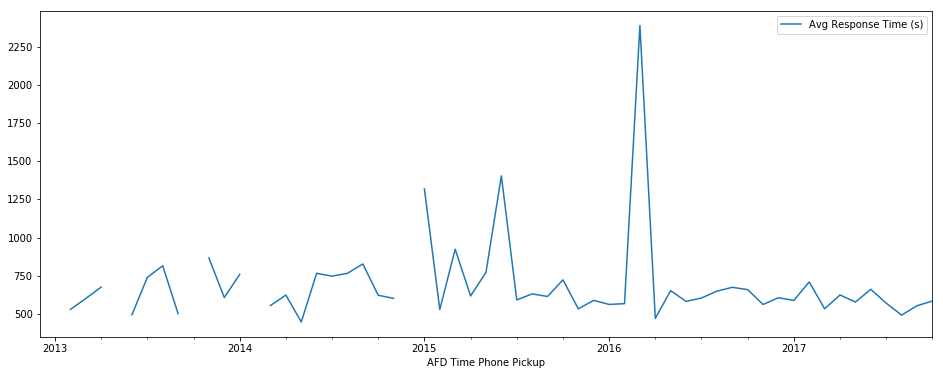

In [31]:
#to do for each response area
#00-01XX Downtown
#00-4209 Moore's Crossing

#00-2608
#00-0504 Eastern Crescent
#00-0505 Eastern Crescent

#00-2405
#00-2404
#00-2403

moores_df = final_df[(final_df['Response Area (COA Only)']=='00-4209')]

moores_month_df = moores_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()
moores_month_df.columns = ['Avg Response Time (s)']
moores_month_df.plot(figsize=(16,6))

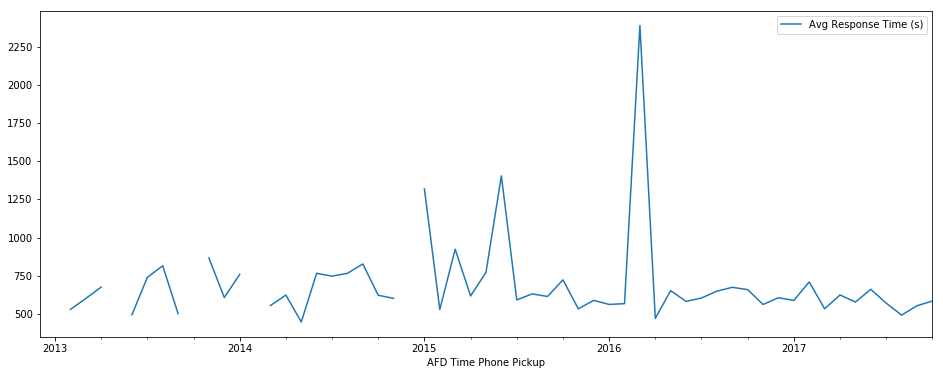

In [32]:
moores_df = final_df[(final_df['Response Area (COA Only)']=='00-4209')]

moores_month_df = moores_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()
moores_month_df.columns = ['Avg Response Time (s)']
moores_month_df.plot(figsize=(16,6))